In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

### Task 1: Import the dataset

In [109]:
df = pd.read_csv(filepath)

In [110]:
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [111]:
df.shape

(2771, 7)

In [112]:
columns = ['age', 'gender', 'bmi', 'number_of_children', 'smoker', 'region', 'charges']
df.columns = columns

In [113]:
df.head(10)

,age,gender,bmi,number_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [114]:
df.replace(to_replace='?', value=np.NaN, inplace=True)

### Task 2: Data wrangling

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 2767 non-null   object 
 1   gender              2771 non-null   int64  
 2   bmi                 2771 non-null   float64
 3   number_of_children  2771 non-null   int64  
 4   smoker              2764 non-null   object 
 5   region              2771 non-null   int64  
 6   charges             2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [116]:
df['age'].replace(to_replace=np.NaN, value=df['age'].astype('float').mean(), inplace=True)
df['smoker'].replace(to_replace=np.NaN, value=df['smoker'].value_counts().idxmax(), inplace=True)
df[['age', 'smoker']] = df[['age', 'smoker']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 2771 non-null   int32  
 1   gender              2771 non-null   int64  
 2   bmi                 2771 non-null   float64
 3   number_of_children  2771 non-null   int64  
 4   smoker              2771 non-null   int32  
 5   region              2771 non-null   int64  
 6   charges             2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [117]:
df['charges'] = df['charges'].round(2)

### Task 3: Exploratory Data Analysis

<AxesSubplot:xlabel='bmi', ylabel='charges'>

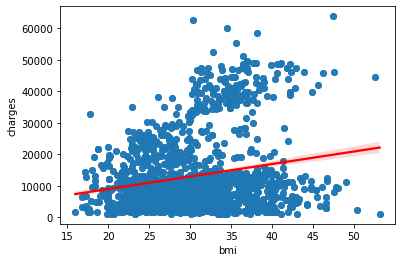

In [118]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color': 'red'})

<AxesSubplot:xlabel='smoker', ylabel='charges'>

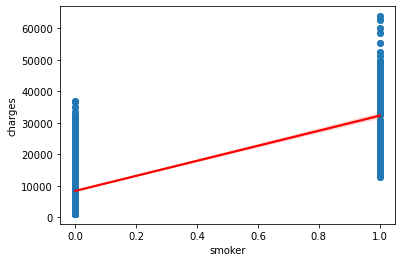

In [119]:
sns.regplot(x='smoker', y='charges', data=df, line_kws={'color': 'red'})

In [120]:
df.corr()

,age,gender,bmi,number_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
number_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


### Task 4: Model Development

#### Features = {'smoker'}

In [121]:
X = df[['smoker']]
Y = df['charges']

In [122]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [123]:
Y_pred = lm.predict(X)

In [124]:
from sklearn.metrics import r2_score
r2_val = r2_score(Y, Y_pred)
print('R^2 =', r2_val)

R^2 = 0.6227430402464125


#### Features = {'age', 'gender', 'bmi', 'number_of_children', 'smoker', 'region'}

In [125]:
X = df[['age', 'gender', 'bmi', 'number_of_children', 'smoker', 'region']]
Y = df['charges']

In [126]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [127]:
Y_pred = lm.predict(X)

In [128]:
r2_val = r2_score(Y, Y_pred)
print('R^2 =', r2_val)

R^2 = 0.7505888664568174


### Task 5: Model Refinement

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [130]:
X = df[['age', 'gender', 'bmi', 'number_of_children', 'smoker', 'region']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [131]:
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)

Ridge(alpha=0.1)

In [132]:
y_pred = rr.predict(X_test)
print('R^2 =', r2_score(y_test, y_pred))

R^2 = 0.7652759824235751


In [133]:
pf = PolynomialFeatures(degree=2)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)
rr.fit(X_train_pf, y_train)

Ridge(alpha=0.1)

In [134]:
y_pred = rr.predict(X_test_pf)
print('R^2 =', r2_score(y_test, y_pred))

R^2 = 0.8588861989130785
